# Tarea Ensamblados


La estabilidad en una matriz energética del país es de suma importancia para el progreso economico y el bienestar de sus habitantes (solo tener presente la sensación de inseguridad, malestar, etc. que se puede generar con un corte no previsto puede afectar el mercado económico y el bienestar de una población)

El desafio es tratar de determinar si la red es estable (columna ```stabf```) basado en un conjunto de caracteristicas disponibles:


1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer. 
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4) 
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer. 
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real) 
5. stabf: the stability label of the system (categorical: stable/unstable) 


Estos datos fueron usados en el paper: "Towards Concise Models of Grid Stability"

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importacion del data set
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


### Creación de los modelos

In [3]:
X = df.drop(['stab', 'stabf'], axis = 1)
Y = df['stabf']

Bagging

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

m = DecisionTreeClassifier()
model = BaggingClassifier(estimator = m, n_estimators = 10)

params = {
    'estimator__max_depth':[2,3],
    'max_samples':[0.1,0.2],
    'estimator__min_samples_split':[2,3,4]
}

grid = GridSearchCV(estimator = model, param_grid = params, cv = 5)
_ = grid.fit(X_train, Y_train)

print(grid.best_score_)
print(grid.best_params_)

0.813875
{'estimator__max_depth': 3, 'estimator__min_samples_split': 3, 'max_samples': 0.2}


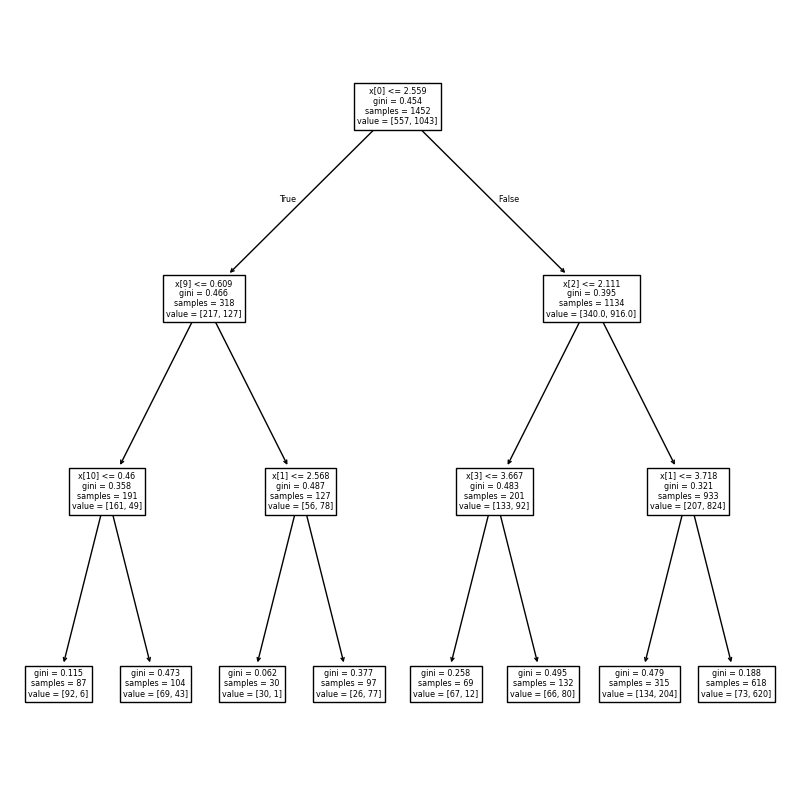

In [18]:
## Visualización de una muestra del bosque creado por el bagging

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

mo_=grid.best_estimator_.estimators_[0]
plt.subplots(1,1,figsize=(10,10))
_=plot_tree(mo_)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

LABELS = ['True', 'False']

def mostrar_resultado(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, cmap = 'Greens', annot=True, fmt = '2d')
    plt.title('Matriz de Confusión')
    plt.ylabel('Verdaderos')
    plt.xlabel('Predicciones')
    plt.show()
    print('-'*110)
    print(classification_report(y_test, y_pred))

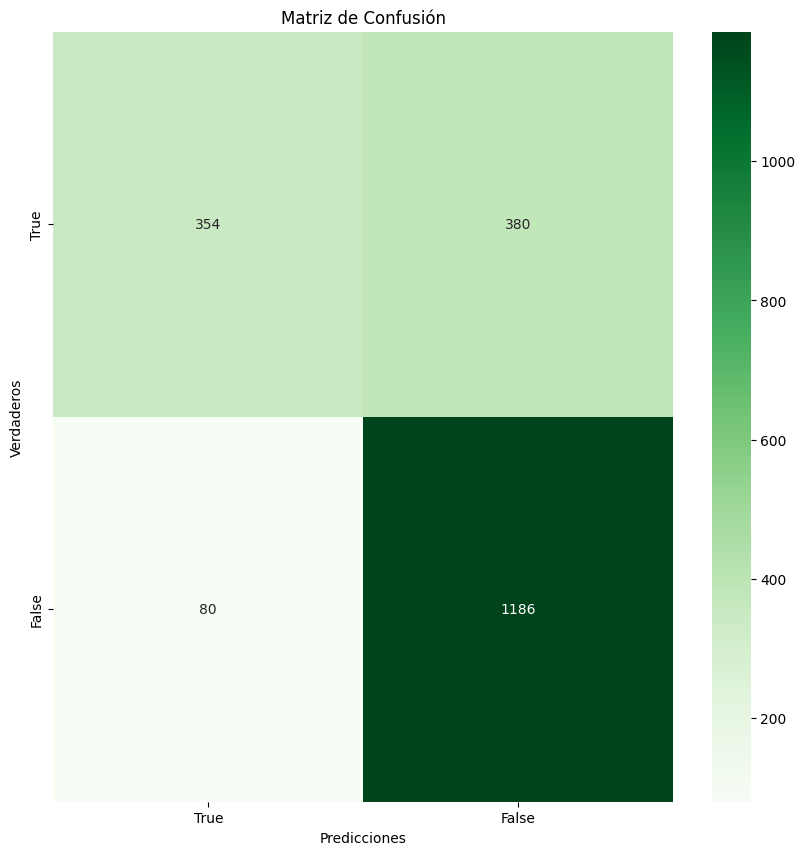

--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

      stable       0.82      0.48      0.61       734
    unstable       0.76      0.94      0.84      1266

    accuracy                           0.77      2000
   macro avg       0.79      0.71      0.72      2000
weighted avg       0.78      0.77      0.75      2000



In [20]:
# Metricas del modelo

from sklearn.metrics import classification_report, confusion_matrix

Y_pred = grid.predict(X_test)

mostrar_resultado(Y_test, Y_pred)

Random Forest

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

model = RandomForestClassifier()

params = {
    'n_estimators':[10],
    'max_depth':[2,3],
    'min_samples_split':[2,3,4],
    'max_leaf_nodes':[5,8]
}

grid = GridSearchCV(estimator=model, param_grid=params, cv = 5)
_=grid.fit(X_train, Y_train)

print(grid.best_score_)
print(grid.best_params_)

0.7747499999999999
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'n_estimators': 10}


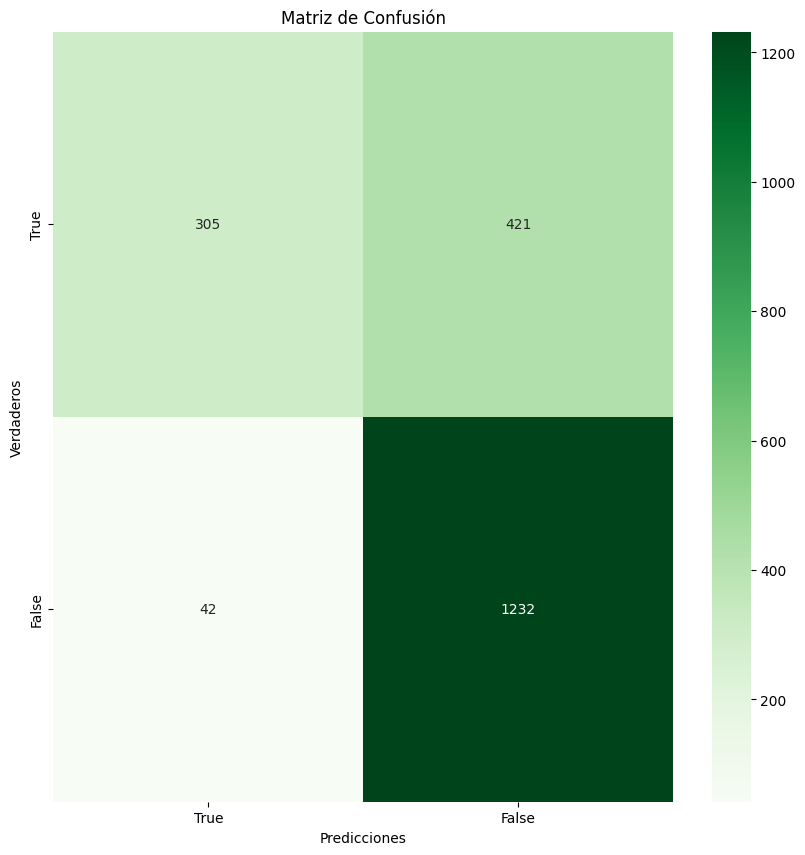

--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

      stable       0.88      0.42      0.57       726
    unstable       0.75      0.97      0.84      1274

    accuracy                           0.77      2000
   macro avg       0.81      0.69      0.71      2000
weighted avg       0.79      0.77      0.74      2000



In [23]:
Y_pred = grid.predict(X_test)

mostrar_resultado(Y_test, Y_pred)

AdaBoost

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

m = DecisionTreeClassifier()
model = AdaBoostClassifier(estimator = m)

params = {
    'n_estimators':[10],
    'estimator__max_depth':[2,3],
    'estimator__min_samples_split':[2,3,4],
    'estimator__max_leaf_nodes':[5,8]
}

grid = GridSearchCV(estimator = model, param_grid=params, cv = 5)
_=grid.fit(X_train, Y_train)

print(grid.best_score_)
print(grid.best_params_)

c:\Users\JGodoy\Documents\University Projects\Fundamentos de Machine Learning\TareaEnsamblados\src\Ensambladoenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\JGodoy\Documents\University Projects\Fundamentos de Machine Learning\TareaEnsamblados\src\Ensambladoenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\JGodoy\Documents\University Projects\Fundamentos de Machine Learning\TareaEnsamblados\src\Ensambladoenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.w

0.8863749999999999
{'estimator__max_depth': 3, 'estimator__max_leaf_nodes': 8, 'estimator__min_samples_split': 2, 'n_estimators': 10}


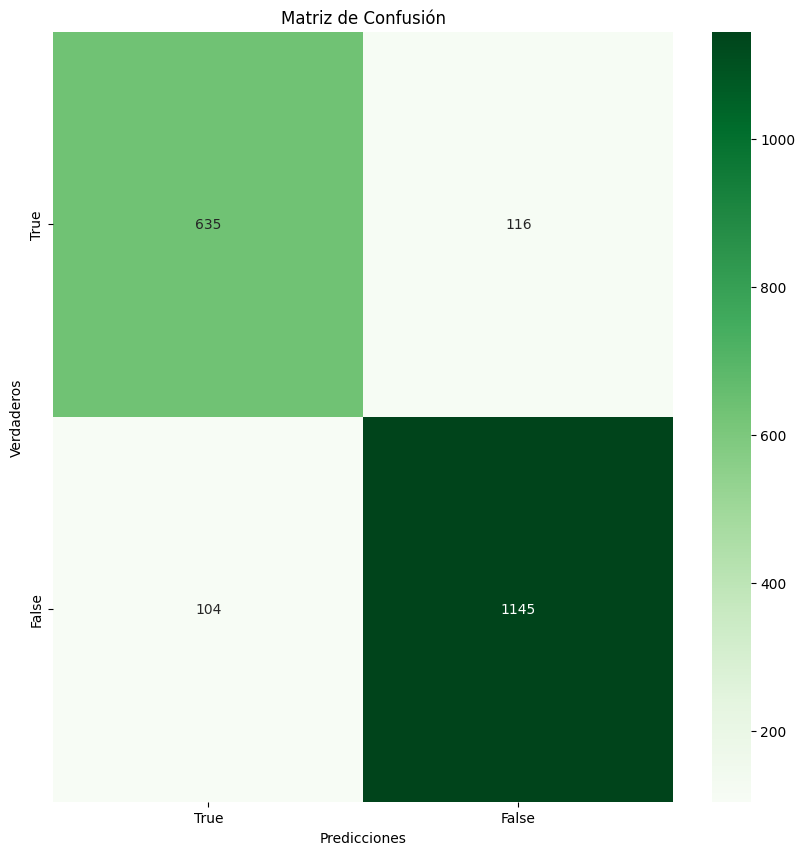

--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

      stable       0.86      0.85      0.85       751
    unstable       0.91      0.92      0.91      1249

    accuracy                           0.89      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.89      0.89      0.89      2000



In [25]:
Y_pred = grid.predict(X_test)
mostrar_resultado(Y_test, Y_pred)

Gradient Boost

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

model = GradientBoostingClassifier()

params = {
    'n_estimators':[10],
    'max_depth':[2,3],
    'min_samples_split':[2,3,4],
    'max_leaf_nodes':[5,8]
}

grid = GridSearchCV(estimator=model, param_grid=params, cv = 5)
_=grid.fit(X_train, Y_train)

print(grid.best_score_)
print(grid.best_params_)

c:\Users\JGodoy\Documents\University Projects\Fundamentos de Machine Learning\TareaEnsamblados\src\Ensambladoenv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.7748750000000001
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'n_estimators': 10}


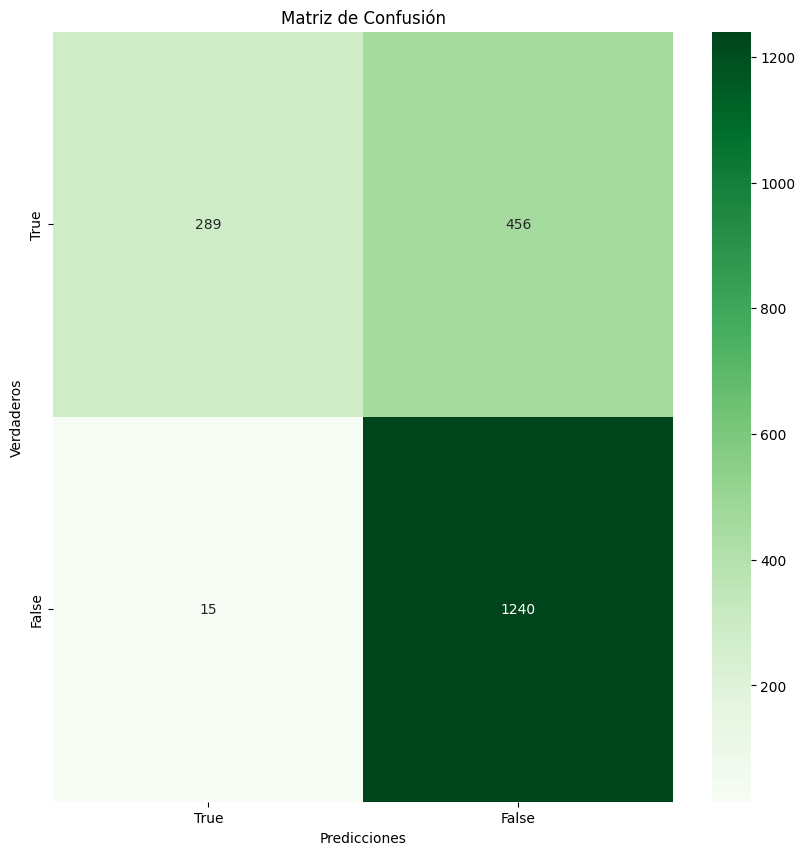

--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

      stable       0.95      0.39      0.55       745
    unstable       0.73      0.99      0.84      1255

    accuracy                           0.76      2000
   macro avg       0.84      0.69      0.70      2000
weighted avg       0.81      0.76      0.73      2000



In [29]:
Y_pred = grid.predict(X_test)
mostrar_resultado(Y_test, Y_pred)